# Exemple 2 : la fonction XOR (persion Lightning)

## 1. Importation des librairies

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl

# On fixe la seed aléatoire pour la reproductibilité
seed = 1
torch.manual_seed(seed)
np.random.seed(seed)


## 2. Définition des données d'apprentissage

In [5]:
# Définition des données d'apprentissage
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
Y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

## 3. Architecture du réseau 

Pour vous aider : https://lightning.ai/docs/pytorch/stable/

In [28]:


class XORModel(pl.LightningModule):
    def __init__(self):
        super(XORModel, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.hidden(x)
        x2 = self.sigmoid(x1)
        x3 = self.output(x2)
        return self.sigmoid(x3)
    
    def training_step(self, batch):
        x, y = batch
        y_pred = self(x)
        # On défini la fonction de coût utlisée
        loss = nn.functional.mse_loss(y_pred, y)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=0.01, momentum=0.9)
        return optimizer

# création d'une instance
xor_model = XORModel()


## 4. Apprentissage du réseau

In [29]:
# Création d'une instance de PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=50, log_every_n_steps=10)

# Entraînement du modèle
trainer.fit(
    xor_model,
    train_dataloaders=torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(X, Y), batch_size=1, shuffle=True
    ),
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type    | Params
------------------------------------
0 | hidden  | Linear  | 6     
1 | output  | Linear  | 3     
2 | sigmoid | Sigmoid | 0     
------------------------------------
9         Trainable params
0         Non-trainable params
9         Total params
0.000     Total estimated model params size (MB)
c:\Users\hp\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
c:\Users\hp\anaconda3\lib\site-packages\pytorch_lightning\loops\fit_loop.py:281: PossibleUserWarning: The number of training batches (

Training: 0it [00:00, ?it/s]

C:\Users\hp\AppData\Local\Temp\ipykernel_15556\1043674548.py:18: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.mse_loss(y_pred, y)
`Trainer.fit` stopped: `max_epochs=50` reached.


## 5. Visualisation des résultats

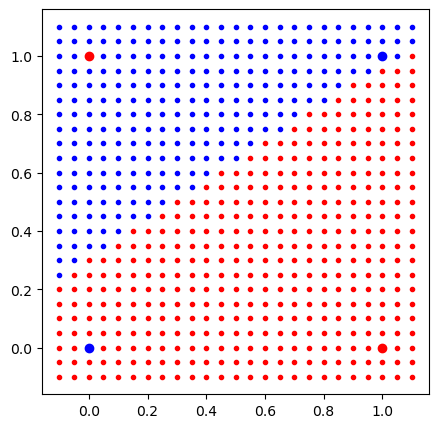

In [30]:
# Visualisation des résultats
def plot_decision_boundary(model):
    plt.figure(figsize=(5, 5))
    for i in np.arange(-0.1, 1.1, 0.05):
        for j in np.arange(-0.1, 1.1, 0.05):
            input_data = torch.tensor([[i, j]], dtype=torch.float32)
            output = model(input_data)
            if output > 0.5:
                plt.plot(i, j, ".r")
            else:
                plt.plot(i, j, ".b")

    for i in range(Y.size(0)):
        if Y[i] == 1:
            plt.plot(X[i, 0], X[i, 1], "ro")
        else:
            plt.plot(X[i, 0], X[i, 1], "bo")

    plt.show()


plot_decision_boundary(xor_model)


## 6. A faire

- Compléter le programme afin d'apprendre la fonction xor
- Modifier l'initialisation (valeur de la seed) et observer le résultat obtennu
- Modifier les paramètres d'apprentissage (pas, momentum...) et observer le résultat